In [1]:
!wget https://raw.githubusercontent.com/cknd/pyESN/master/pyESN.py

--2025-07-16 19:59:36--  https://raw.githubusercontent.com/cknd/pyESN/master/pyESN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10789 (11K) [text/plain]
Saving to: ‘pyESN.py.1’

pyESN.py.1          100%[===================>]  10.54K  --.-KB/s    in 0.001s  

2025-07-16 19:59:38 (7.00 MB/s) - ‘pyESN.py.1’ saved [10789/10789]



In [2]:
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
from pyESN import ESN
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

In [7]:
data=pd.read_excel("/workspaces/Time-series-prediction-for-pollution-data/air_pollution_data.xlsx")

In [8]:
data

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,2020-11-30,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,2020-12-01,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,2020-12-02,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,2020-12-03,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,2020-12-04,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,2023-05-21,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,2023-05-22,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,2023-05-23,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,2023-05-24,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


# SORTING CITIES

I separated the dataset city wise and then copied data corresponding to each city in separate datasets in city separated dict named as "city_df".

To access the data for each city we can use city_df["city name"]

In [9]:
unique_city = data["city"].unique()

# Sorting cities alphabetically
unique_city= sorted(unique_city)

In [ ]:
#dict to hold city wise data
city_df = {}

In [13]:
for city in data["city"].unique():
    city_df[city] = data[data["city"] == city].copy()


In [14]:
city_df

{'Ahmedabad':           city       date  aqi       co     no    no2      o3    so2   pm2_5  \
 0    Ahmedabad 2020-11-30    5   520.71   2.38  16.28  130.18  47.68   65.96   
 1    Ahmedabad 2020-12-01    5  1682.28   7.71  54.84    0.73  21.70  120.95   
 2    Ahmedabad 2020-12-02    5  1815.80  16.54  49.35    0.17  23.84  133.47   
 3    Ahmedabad 2020-12-03    5  2296.45  41.57  40.10    0.00  35.76  150.37   
 4    Ahmedabad 2020-12-04    5  2189.64  23.92  58.95    0.02  28.13  160.79   
 ..         ...        ...  ...      ...    ...    ...     ...    ...     ...   
 899  Ahmedabad 2023-05-21    3   350.48   0.00  10.28   42.92   9.78   18.87   
 900  Ahmedabad 2023-05-22    3   313.76   0.00   7.97   45.06   8.58   16.86   
 901  Ahmedabad 2023-05-23    3   390.53   0.00  12.34   38.27  13.35   18.04   
 902  Ahmedabad 2023-05-24    3   307.08   0.00   8.74   45.06   9.89   18.49   
 903  Ahmedabad 2023-05-25    3   283.72   0.00   6.51   42.92   7.63   12.62   
 
        pm10 

In [15]:
city_df.keys()

dict_keys(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam'])

## City Data description

In [16]:
city_df["Ahmedabad"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 904 entries, 0 to 903
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    904 non-null    object        
 1   date    904 non-null    datetime64[ns]
 2   aqi     904 non-null    int64         
 3   co      904 non-null    float64       
 4   no      904 non-null    float64       
 5   no2     904 non-null    float64       
 6   o3      904 non-null    float64       
 7   so2     904 non-null    float64       
 8   pm2_5   904 non-null    float64       
 9   pm10    904 non-null    float64       
 10  nh3     904 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 84.8+ KB


In [17]:
city_df["Ahmedabad"].isnull().sum()

city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

aqi
1     24
2    118
3     85
4    180
5    497
Name: count, dtype: int64


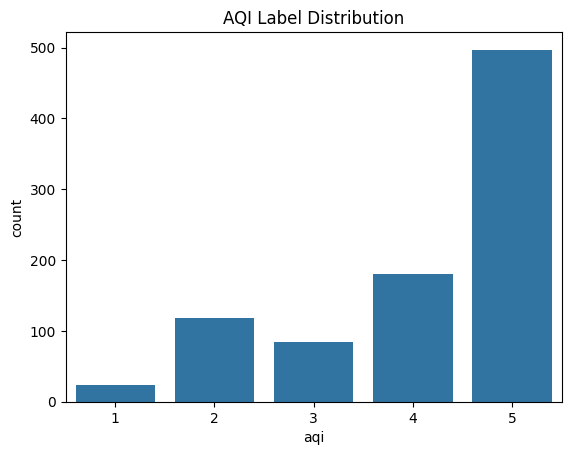

In [18]:
print(city_df["Ahmedabad"]["aqi"].value_counts().sort_index())
sns.countplot(data=city_df["Ahmedabad"], x="aqi")
mp.title("AQI Label Distribution")
mp.show()

In [19]:
city_df["Ahmedabad"].describe()

,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,904,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,2022-02-25 02:53:37.699115008,4.115044,1129.796969,10.324248,29.321327,27.862113,23.198717,81.831416,111.726482,16.245996
min,2020-11-30 00:00:00,1.000000,243.660000,0.000000,4.110000,0.000000,3.010000,5.500000,6.260000,0.670000
25%,2021-07-13 18:00:00,3.000000,433.920000,0.000000,14.355000,0.547500,13.230000,25.960000,47.995000,4.810000
50%,2022-02-24 12:00:00,5.000000,747.680000,0.050000,22.620000,21.370000,17.640000,59.950000,88.320000,11.910000
75%,2022-10-09 06:00:00,5.000000,1401.900000,7.877500,39.760000,46.490000,25.270000,105.587500,142.170000,19.760000
max,2023-05-25 00:00:00,5.000000,9826.660000,214.580000,156.280000,130.180000,204.090000,696.790000,773.860000,178.340000
std,NaN,1.180328,1111.950011,24.279473,20.684854,27.743093,19.604988,83.669152,98.238384,19.095387


# model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
ahmedabad_df=data[data["city"] == "Ahmedabad"].copy()

x = ahmedabad_df.drop(columns=["city", "aqi","date"])
y = ahmedabad_df["aqi"]

In [22]:
features=ahmedabad_df.columns

In [23]:
features=[f for f in features if f != "aqi" and f!= "date" and f!="city"] #all except aqi column
features

['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

In [24]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [25]:
pickle.dump(scaler,open("minmaxscaling.pkl","wb"))

In [26]:
lookback = 5
forecast_horizon = 20

# ESN (Echo State Network)


In [27]:
esn_models = {}
predictions = {}
true_values = {}

Training ESN for: co


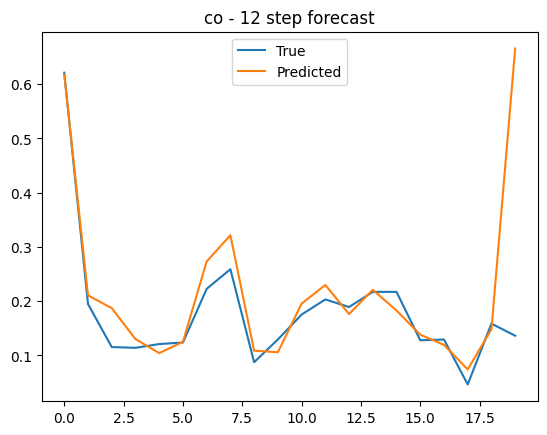

Training ESN for: no


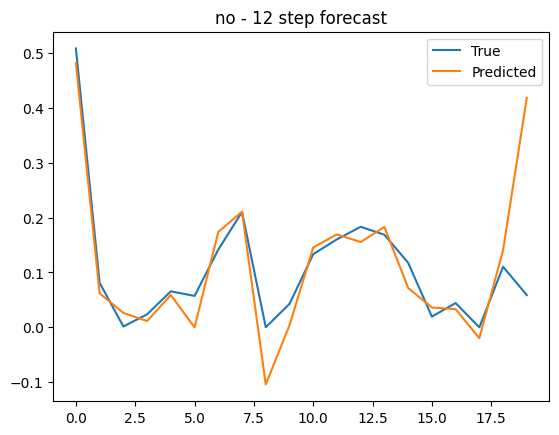

Training ESN for: no2


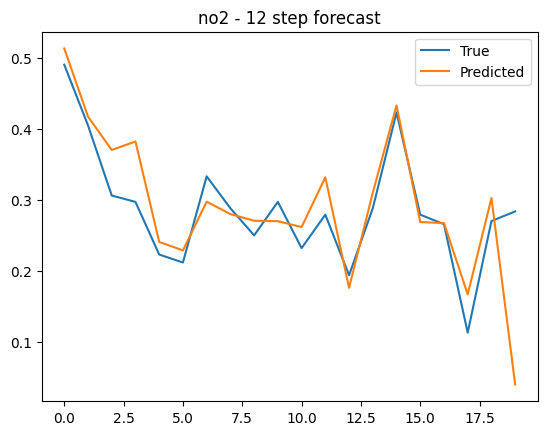

Training ESN for: o3


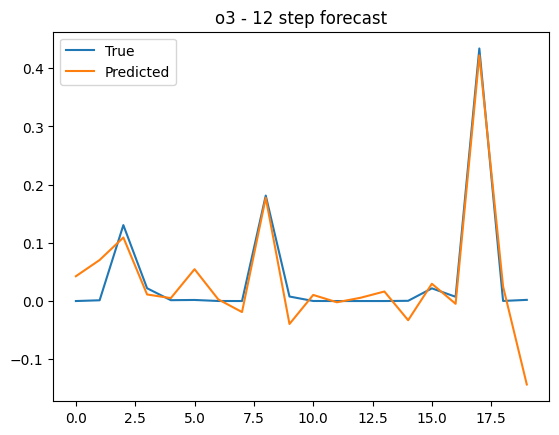

Training ESN for: so2


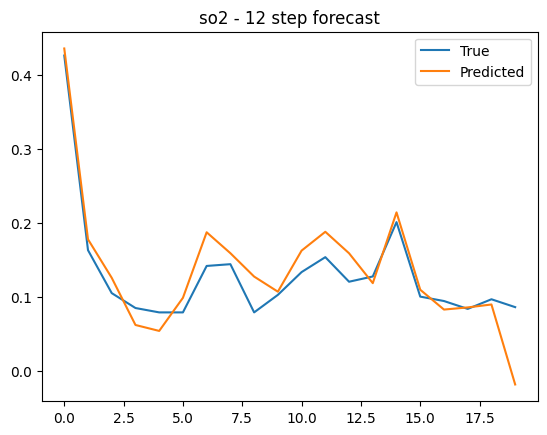

Training ESN for: pm2_5


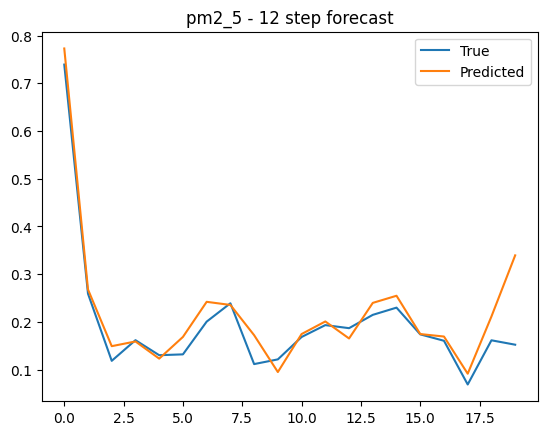

Training ESN for: pm10


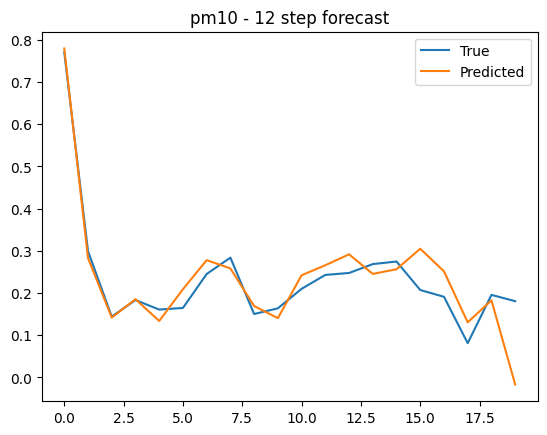

Training ESN for: nh3


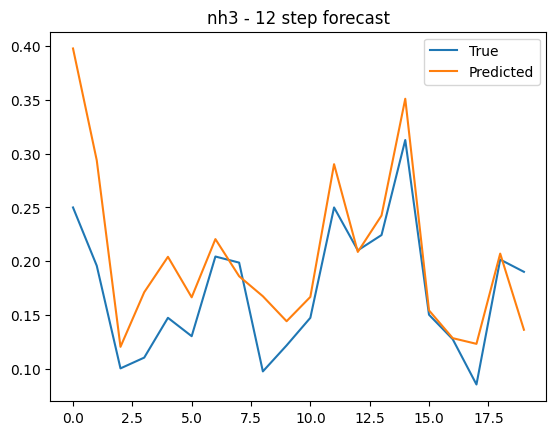

In [ ]:
for feature in features:
    print(f"Training ESN for: {feature}")
    idx = idx = features.index(feature   )#column index / index of feature iterator

    # X and Y for this feature
    X, Y = [], []                                    # X is input feature and Y is output
                                                     # the output target (12-step future values of feature)
    for i in range(len(x) - lookback - forecast_horizon):   # we stop this much before end so that all X must have 12 Y's as its target.
        # use just the last time step's full feature vector
        X.append(x[i+lookback-1, :])
        # target: next 12 steps of this feature
        Y.append(x[i+lookback:i+lookback+forecast_horizon, idx])

    X, Y = np.array(X), np.array(Y)
    X_train, X_test = X[:int(0.8*len(X))], X[int(0.8*len(X)):]
    Y_train, Y_test = Y[:int(0.8*len(Y))], Y[int(0.8*len(Y)):]

    # train ESN
    esn = ESN(n_inputs=X.shape[1], n_outputs=forecast_horizon,
              n_reservoir=500, spectral_radius=0.95, sparsity=0.1)
    esn.fit(X_train, Y_train)
    Y_pred = esn.predict(X_test, len(Y_test))

    # Save model and predictions
    esn_models[feature] = esn
    predictions[feature] = Y_pred
    true_values[feature] = Y_test

    #save model to file
    with open(f"{feature}_esn_model.pkl", "wb") as f:
        pickle.dump(esn, f)

    # Plot one sample
    mp.figure()
    mp.plot(Y_test[0], label="True")
    mp.plot(Y_pred[0], label="Predicted")
    mp.title(f"{feature} - 20 step forecast")
    mp.legend()
    mp.show()

## errors / eval matrices


In [29]:
def evaluate_forecast(Y_true, Y_pred):
    horizons = Y_true.shape[1]
    rmse_per_horizon = []   #rmse
    mae_per_horizon = []   #mae
    r2_per_horizon = []    #r2 score

    for i in range(horizons):  # for each step ahead (1 to 12)
        true_step = Y_true[:, i]
        pred_step = Y_pred[:, i]

        rmse = np.sqrt(mean_squared_error(true_step, pred_step))
        mae = mean_absolute_error(true_step, pred_step)
        r2 = r2_score(true_step, pred_step)

        rmse_per_horizon.append(rmse)
        mae_per_horizon.append(mae)
        r2_per_horizon.append(r2)

    return rmse_per_horizon, mae_per_horizon, r2_per_horizon

In [30]:
rmse_list, mae_list, r2_list = evaluate_forecast(true_values['pm2_5'], predictions['pm2_5'])

In [31]:
rmse_list

[np.float64(0.15822977212914002),
 np.float64(0.15184010302073914),
 np.float64(0.15520965210978444),
 np.float64(0.1551456111596843),
 np.float64(0.1550433965350597),
 np.float64(0.16175771554118396),
 np.float64(0.1629551093030458),
 np.float64(0.17030633706209825),
 np.float64(0.1741876375243475),
 np.float64(0.17128703096917267),
 np.float64(0.1805994427431378),
 np.float64(0.2038649911802688),
 np.float64(0.20768875094257994),
 np.float64(0.2360969117689549),
 np.float64(0.2682682924338358),
 np.float64(0.2898102087783069),
 np.float64(0.3353460797259935),
 np.float64(0.4008864065171504),
 np.float64(0.5124980405408527),
 np.float64(0.692579733573242)]